# LSTM base net Implemented by Keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

import tensorflow.keras as keras
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

import ipdb
import dan_utils

In [2]:
# 设置随机数种子
seed = 25
dan_utils.setup_seed(seed)

# Load data

In [3]:
flow_df = pd.read_csv('../data/revised_data/flow_y_revised.csv')
flow = flow_df.to_numpy()

In [4]:
flow.shape

(40, 4464)

# Data assembling

In [5]:
# # sliding window
# window_size = 10
# pred_size = 20
# train_X = np.zeros([flow.shape[0] - window_size - pred_size + 1, window_size, flow.shape[1]])
# train_y = np.zeros(train_X.shape[0], pred_size)

# for i in range(window_size):
#     train_X[:, i, :] += flow_df.shift(window_size - i - 1).iloc[window_size - 1:, :]
#     # train_y[:, i] += flow_df.shift(window_size - i - 1).iloc[window_size - 1:, :]


In [6]:
def sliding_window(data, window_size, pred_samp, prop):
    
#     data = data.flatten()
    data_out = []
    label_out = []
    for i in range(data.shape[1] - window_size - pred_samp):
        data_out.append(data[:, i : i + window_size])
        # to predict the next [window size] flows
        label_out.append(data[:, i + window_size + 1: i + window_size + 1 + pred_samp])
    data_out = np.array(data_out)
    label_out = np.array(label_out)
#     ipdb.set_trace()
    train_data_out = data_out[:int(data_out.shape[0]*prop), :]
    train_label_out = label_out[:int(data_out.shape[0]*prop)]
    val_data_out = data_out[int(data_out.shape[0]*prop):, :]
    val_label_out = label_out[int(data_out.shape[0]*prop):]
    
    train_data_out = np.transpose(train_data_out, [0, 2, 1])
    train_label_out = np.transpose(train_label_out, [0, 2, 1])
    val_data_out = np.transpose(val_data_out, [0, 2, 1])
    val_label_out = np.transpose(val_label_out, [0, 2, 1])
    
    return train_data_out, train_label_out, val_data_out, val_label_out


In [7]:
window_size = 10
pred_samp = 10

train_X, train_y, test_X, test_y = sliding_window(flow, window_size, pred_samp, 24/31)

In [8]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(3440, 10, 40)
(3440, 10, 40)
(1004, 10, 40)
(1004, 10, 40)


# LSTM network (base)

In [9]:
# data at the position of "number of detectors" are the same
assert train_X.shape[2] == train_y.shape[2]
assert train_X.shape[2] == test_X.shape[2]
assert train_X.shape[2] == test_y.shape[2]
num_det = flow.shape[0]

hid_dim = 10

In [10]:
train_X.shape

(3440, 10, 40)

In [11]:
model = keras.models.Sequential()
# out shape: [window_size, hid_dim]
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LSTM(units=hid_dim, return_sequences=True))
# model.add(keras.layers.Flatten())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(num_det, activation='relu'))

# Training on target data

In [12]:
model.compile(loss='mse', optimizer='adam')
history = model.fit(train_X, train_y, epochs=100, batch_size=128, validation_data=(test_X, test_y), verbose=1, shuffle=True)

Epoch 1/100
27/27 [==============================] - 4s 54ms/step - loss: 244002.3672 - val_loss: 242075.1250
Epoch 2/100
27/27 [==============================] - 0s 8ms/step - loss: 238569.4263 - val_loss: 239133.7969
Epoch 3/100
27/27 [==============================] - 0s 8ms/step - loss: 236447.4308 - val_loss: 232022.4219
Epoch 4/100
27/27 [==============================] - 0s 8ms/step - loss: 230171.4397 - val_loss: 220949.1875
Epoch 5/100
27/27 [==============================] - 0s 8ms/step - loss: 218486.1819 - val_loss: 205873.0312
Epoch 6/100
27/27 [==============================] - 0s 8ms/step - loss: 205857.7907 - val_loss: 186793.2188
Epoch 7/100
27/27 [==============================] - 0s 8ms/step - loss: 191293.4860 - val_loss: 164199.5156
Epoch 8/100
27/27 [==============================] - 0s 8ms/step - loss: 164160.5446 - val_loss: 142364.8594
Epoch 9/100
27/27 [==============================] - 0s 8ms/step - loss: 137862.1334 - val_loss: 118964.1094
Epoch 10/100
27/27

Epoch 77/100
27/27 [==============================] - 0s 8ms/step - loss: 9059.6024 - val_loss: 10636.0654
Epoch 78/100
27/27 [==============================] - 0s 8ms/step - loss: 9576.6425 - val_loss: 10499.1582
Epoch 79/100
27/27 [==============================] - 0s 8ms/step - loss: 9440.7450 - val_loss: 10513.0723
Epoch 80/100
27/27 [==============================] - 0s 8ms/step - loss: 9261.7390 - val_loss: 10654.6543
Epoch 81/100
27/27 [==============================] - 0s 8ms/step - loss: 9637.8898 - val_loss: 10662.5000
Epoch 82/100
27/27 [==============================] - 0s 8ms/step - loss: 8796.4390 - val_loss: 11154.7637
Epoch 83/100
27/27 [==============================] - 0s 8ms/step - loss: 9761.0597 - val_loss: 10973.5166
Epoch 84/100
27/27 [==============================] - 0s 8ms/step - loss: 9248.2899 - val_loss: 10643.9941
Epoch 85/100
27/27 [==============================] - 0s 8ms/step - loss: 9375.2856 - val_loss: 10280.3623
Epoch 86/100
27/27 [=================

# Visualization

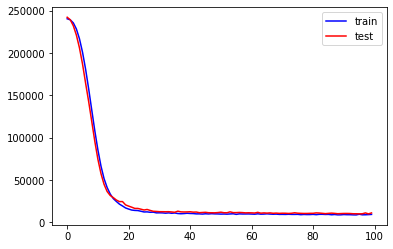

In [13]:
p1 = plt.plot(history.history['loss'], color='blue', label='train')
p2 = plt.plot(history.history['val_loss'], color='red',label='test')
plt.legend()

In [14]:
yhat = model.predict(test_X)

In [15]:
test_y.shape

(1004, 10, 40)

Text(0.5, 1.0, 'Testing dataset')

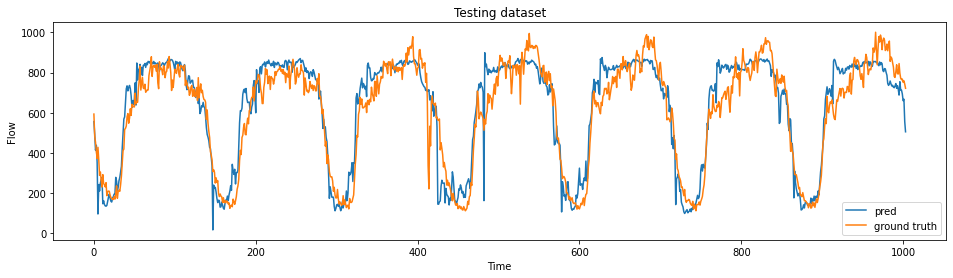

In [18]:
n_step_ahead = 3
det = 0

plt.figure(figsize=[16,4])
plt.plot(yhat[:, n_step_ahead, det], label='pred')
plt.plot(test_y[:, n_step_ahead, det], label='ground truth')
plt.legend()
plt.xlabel('Time')  # time gran: 15 min
plt.ylabel('Flow')
plt.title('Testing dataset')

# Evaluation

In [17]:
#transfer with DAN 预测精度计算
m=0
model_pre = yhat
label_test_target = test_y

nrmse_mean = dan_utils.nrmse_loss_func(model_pre, label_test_target, m)
mape_mean = dan_utils.mape_loss_func(model_pre, label_test_target, m)
smape_mean = dan_utils.smape_loss_func(model_pre, label_test_target, m)
mae_mean = dan_utils.mae_loss_func(model_pre, label_test_target, m)

print('nrmse = ' + str(nrmse_mean) + '\n' + 'mape = ' + str(mape_mean) + '\n' + 'smape = ' + str(smape_mean) + '\n' + 'mae = ' + str(mae_mean))

nrmse = 0.21382095492213796
mape = 0.3795720530157864
smape = 0.12644910633055412
mae = 75.69701530100771
